# **Exploratory Data Analysis (EDA)**

### Importing all necessary libraries

In [1]:
import pandas as pd           # For data handling and analysis
import numpy as np            # For numerical computations
import seaborn as sns         # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
def plot_data():
    # Ensures that plots are displayed within the notebook
    %matplotlib inline

### Loading the Dataset

In [2]:
file_path = '/content/glass.xlsx'
# Load the Excel file and list all sheet names to confirm available sheets
excel_file = pd.ExcelFile(file_path)
print("Available sheets:", excel_file.sheet_names)

Available sheets: ['Description', 'glass']


In [3]:
# Load the 'glass' sheet into a DataFrame
data = pd.read_excel(file_path, sheet_name='glass')

# Display the first few rows of the dataset to understand its structure
print("\nPreview of the dataset (first 5 rows):")
print(data.head())


Preview of the dataset (first 5 rows):
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


### Structure of the Dataset

In [4]:
# Checking the Shape of the Dataset
print("\nShape of the dataset (rows, columns):", data.shape)    # This provides the number of rows and columns in the dataset


Shape of the dataset (rows, columns): (214, 10)


In [5]:
# Displaying Information About Each Column
print("\nDataset Information:")
print(data.info())    # Shows data types and non-null counts to identify missing values


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [6]:
# Summary Statistics of Numerical Columns
print("\nSummary Statistics of Numerical Columns:")
print(data.describe())    # Provides insights like mean, standard deviation, min, max, and percentiles


Summary Statistics of Numerical Columns:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min 

### Checking for Missing Values

In [7]:
# Identifying Missing Values in Each Column
print("\nNumber of Missing Values in Each Column:")
print(data.isnull().sum())    # The sum of null values for each column helps spot columns with missing data


Number of Missing Values in Each Column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


# **Data Visualization**

### Importing necessary libraries for visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
# Select only numerical columns for plotting
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("\nNumeric columns available for plotting:", numeric_columns)


Numeric columns available for plotting: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [10]:
# Calculate the number of rows and columns based on the number of plots
num_plots = len(numeric_columns)
num_cols = 3  # Set the number of columns
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)  # Compute rows needed

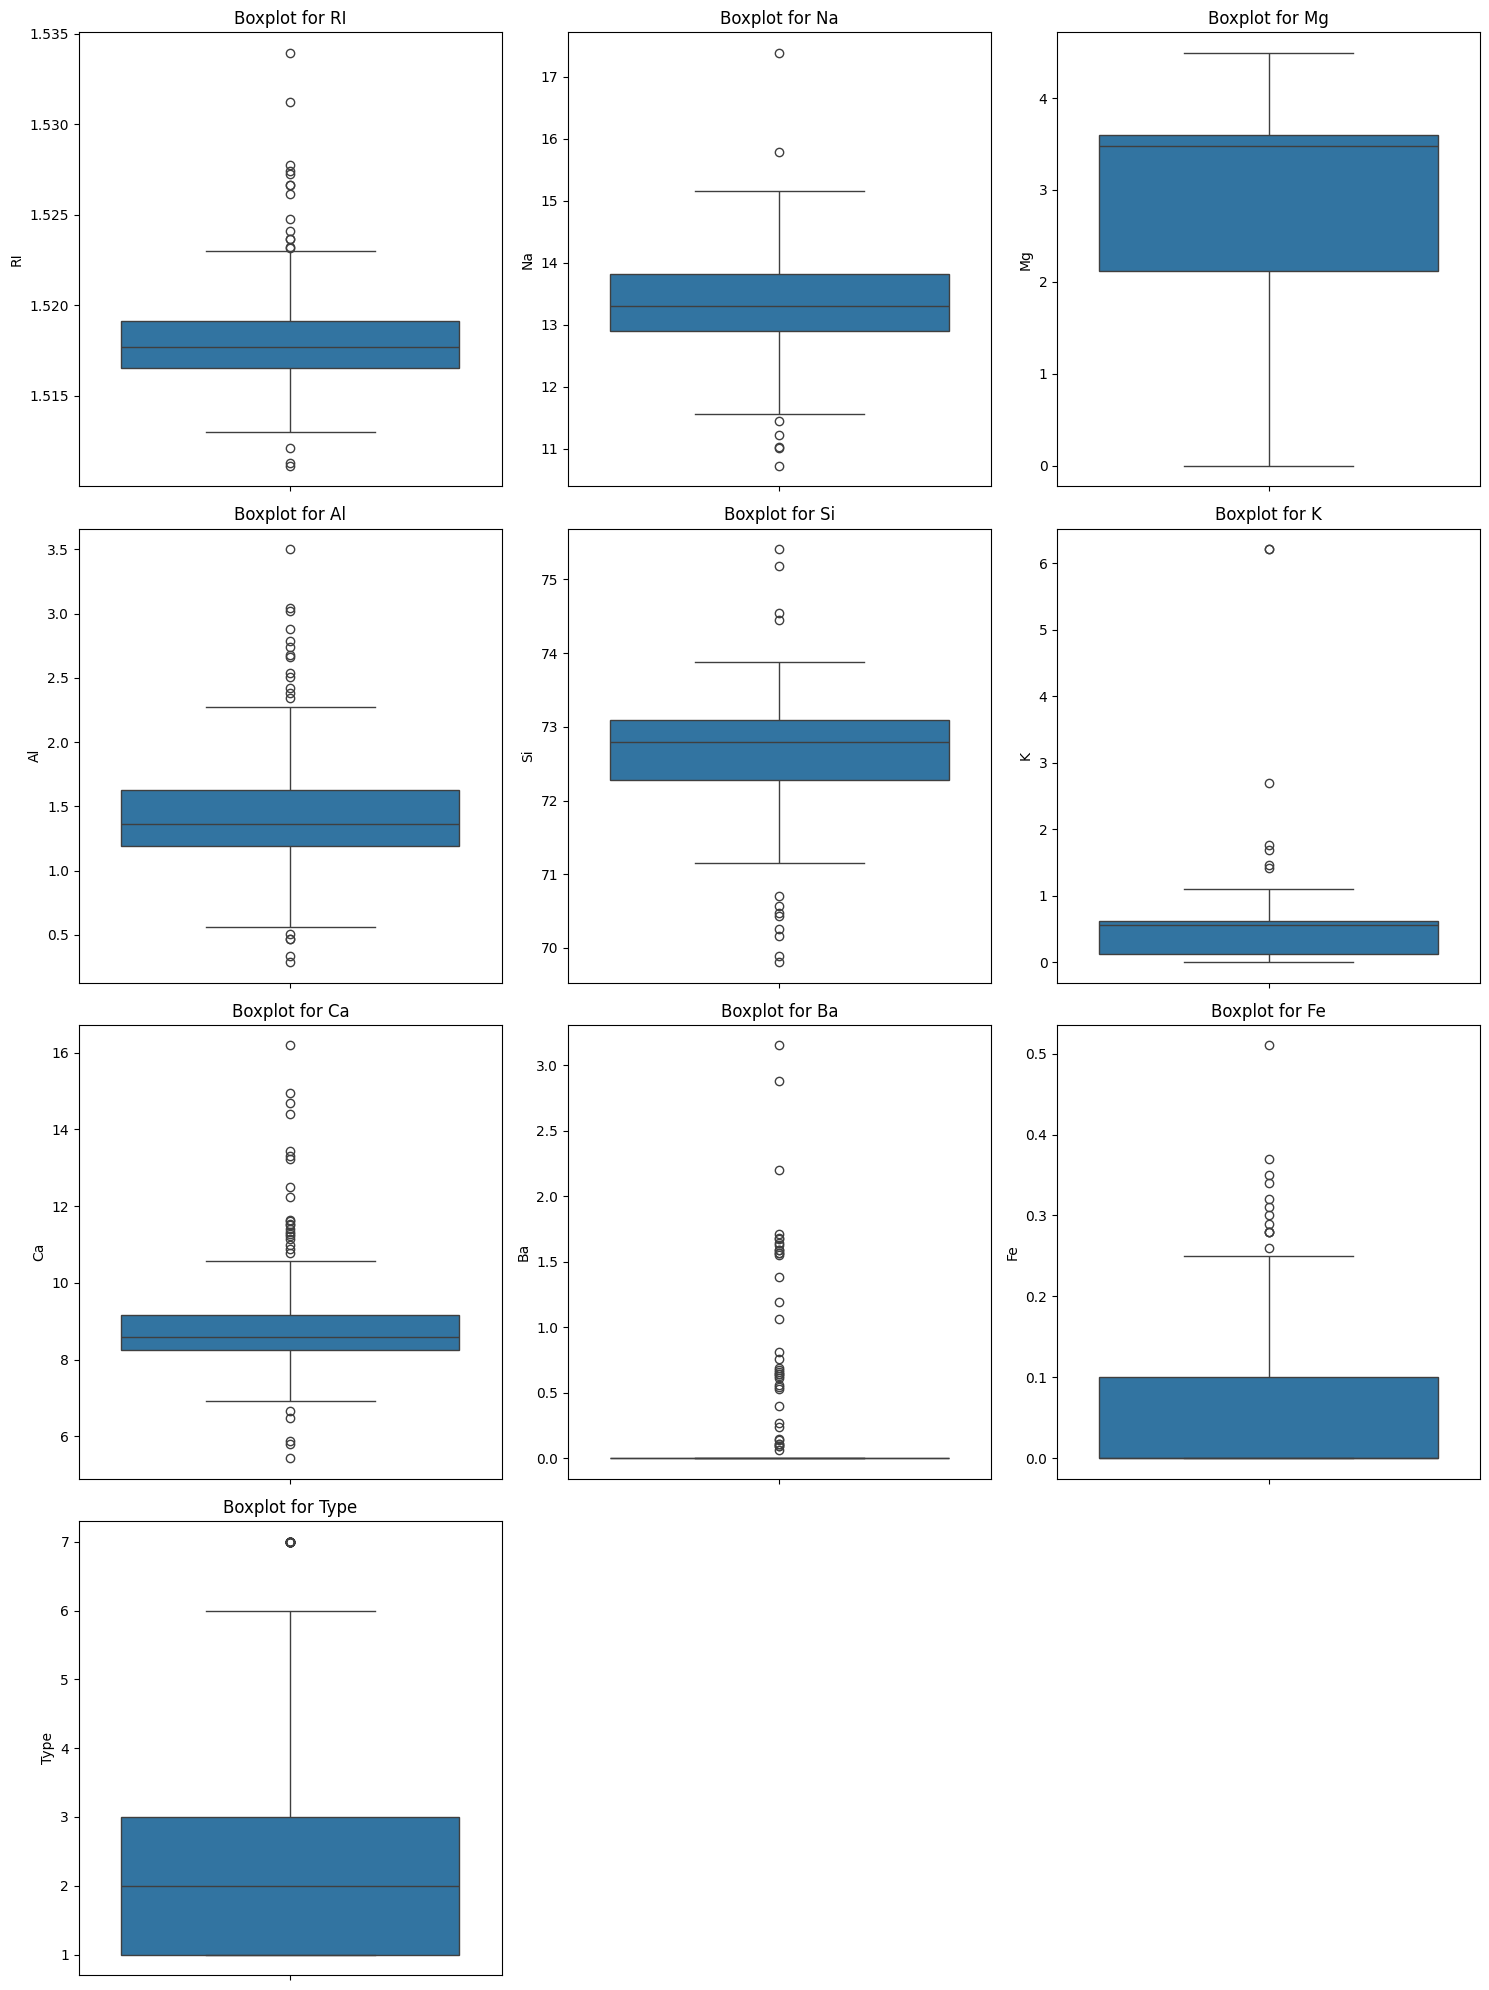

In [11]:
# Initialize the plotting area with a specified figure size
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of rows

# Loop through each numerical column and create a boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplot for each column
    sns.boxplot(y=data[column])  # Boxplot for the selected column
    plt.title(f'Boxplot for {column}')  # Title for the boxplot

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

In [12]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Confirm that the duplicates were removed
duplicates_after = data_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows After Removal: {duplicates_after}")


Number of Duplicate Rows After Removal: 0


In [13]:
# Checking for columns with a small number of unique values that might be categorical
for column in data.columns:
    num_unique = data[column].nunique()
    if num_unique < 10:  # Adjust this threshold based on your dataset
        print(f"Potential categorical column: {column} (Unique values: {num_unique})")


Potential categorical column: Type (Unique values: 6)


Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


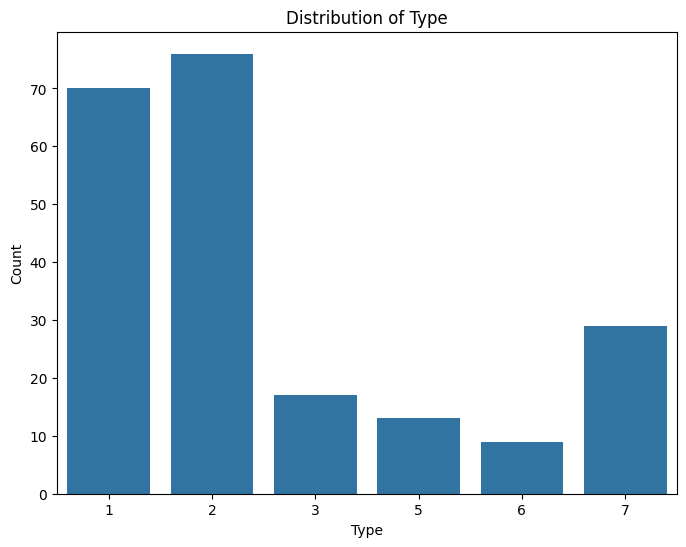

In [14]:
# Count the occurrences of each category in 'Type'
print(data['Type'].value_counts())

# Plot the distribution of 'Type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=data)
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()



### Visualizing Relationships Between Variables

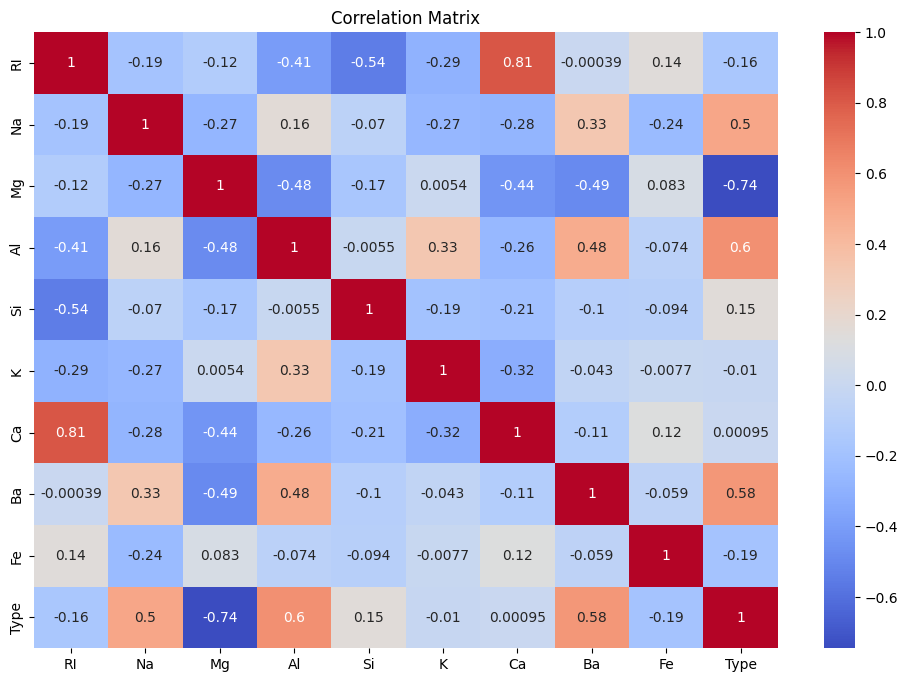

In [15]:
# Correlation Matrix of Numerical Variables
# The heatmap provides insights into the relationships between different numerical variables
plt.figure(figsize=(12, 8))  # Setting the size of the heatmap
correlation_matrix = data.corr()  # Calculating the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Creating a heatmap with annotations
plt.title('Correlation Matrix')  # Title for the heatmap
plt.show()

### Pairplot to Visualize Relationships

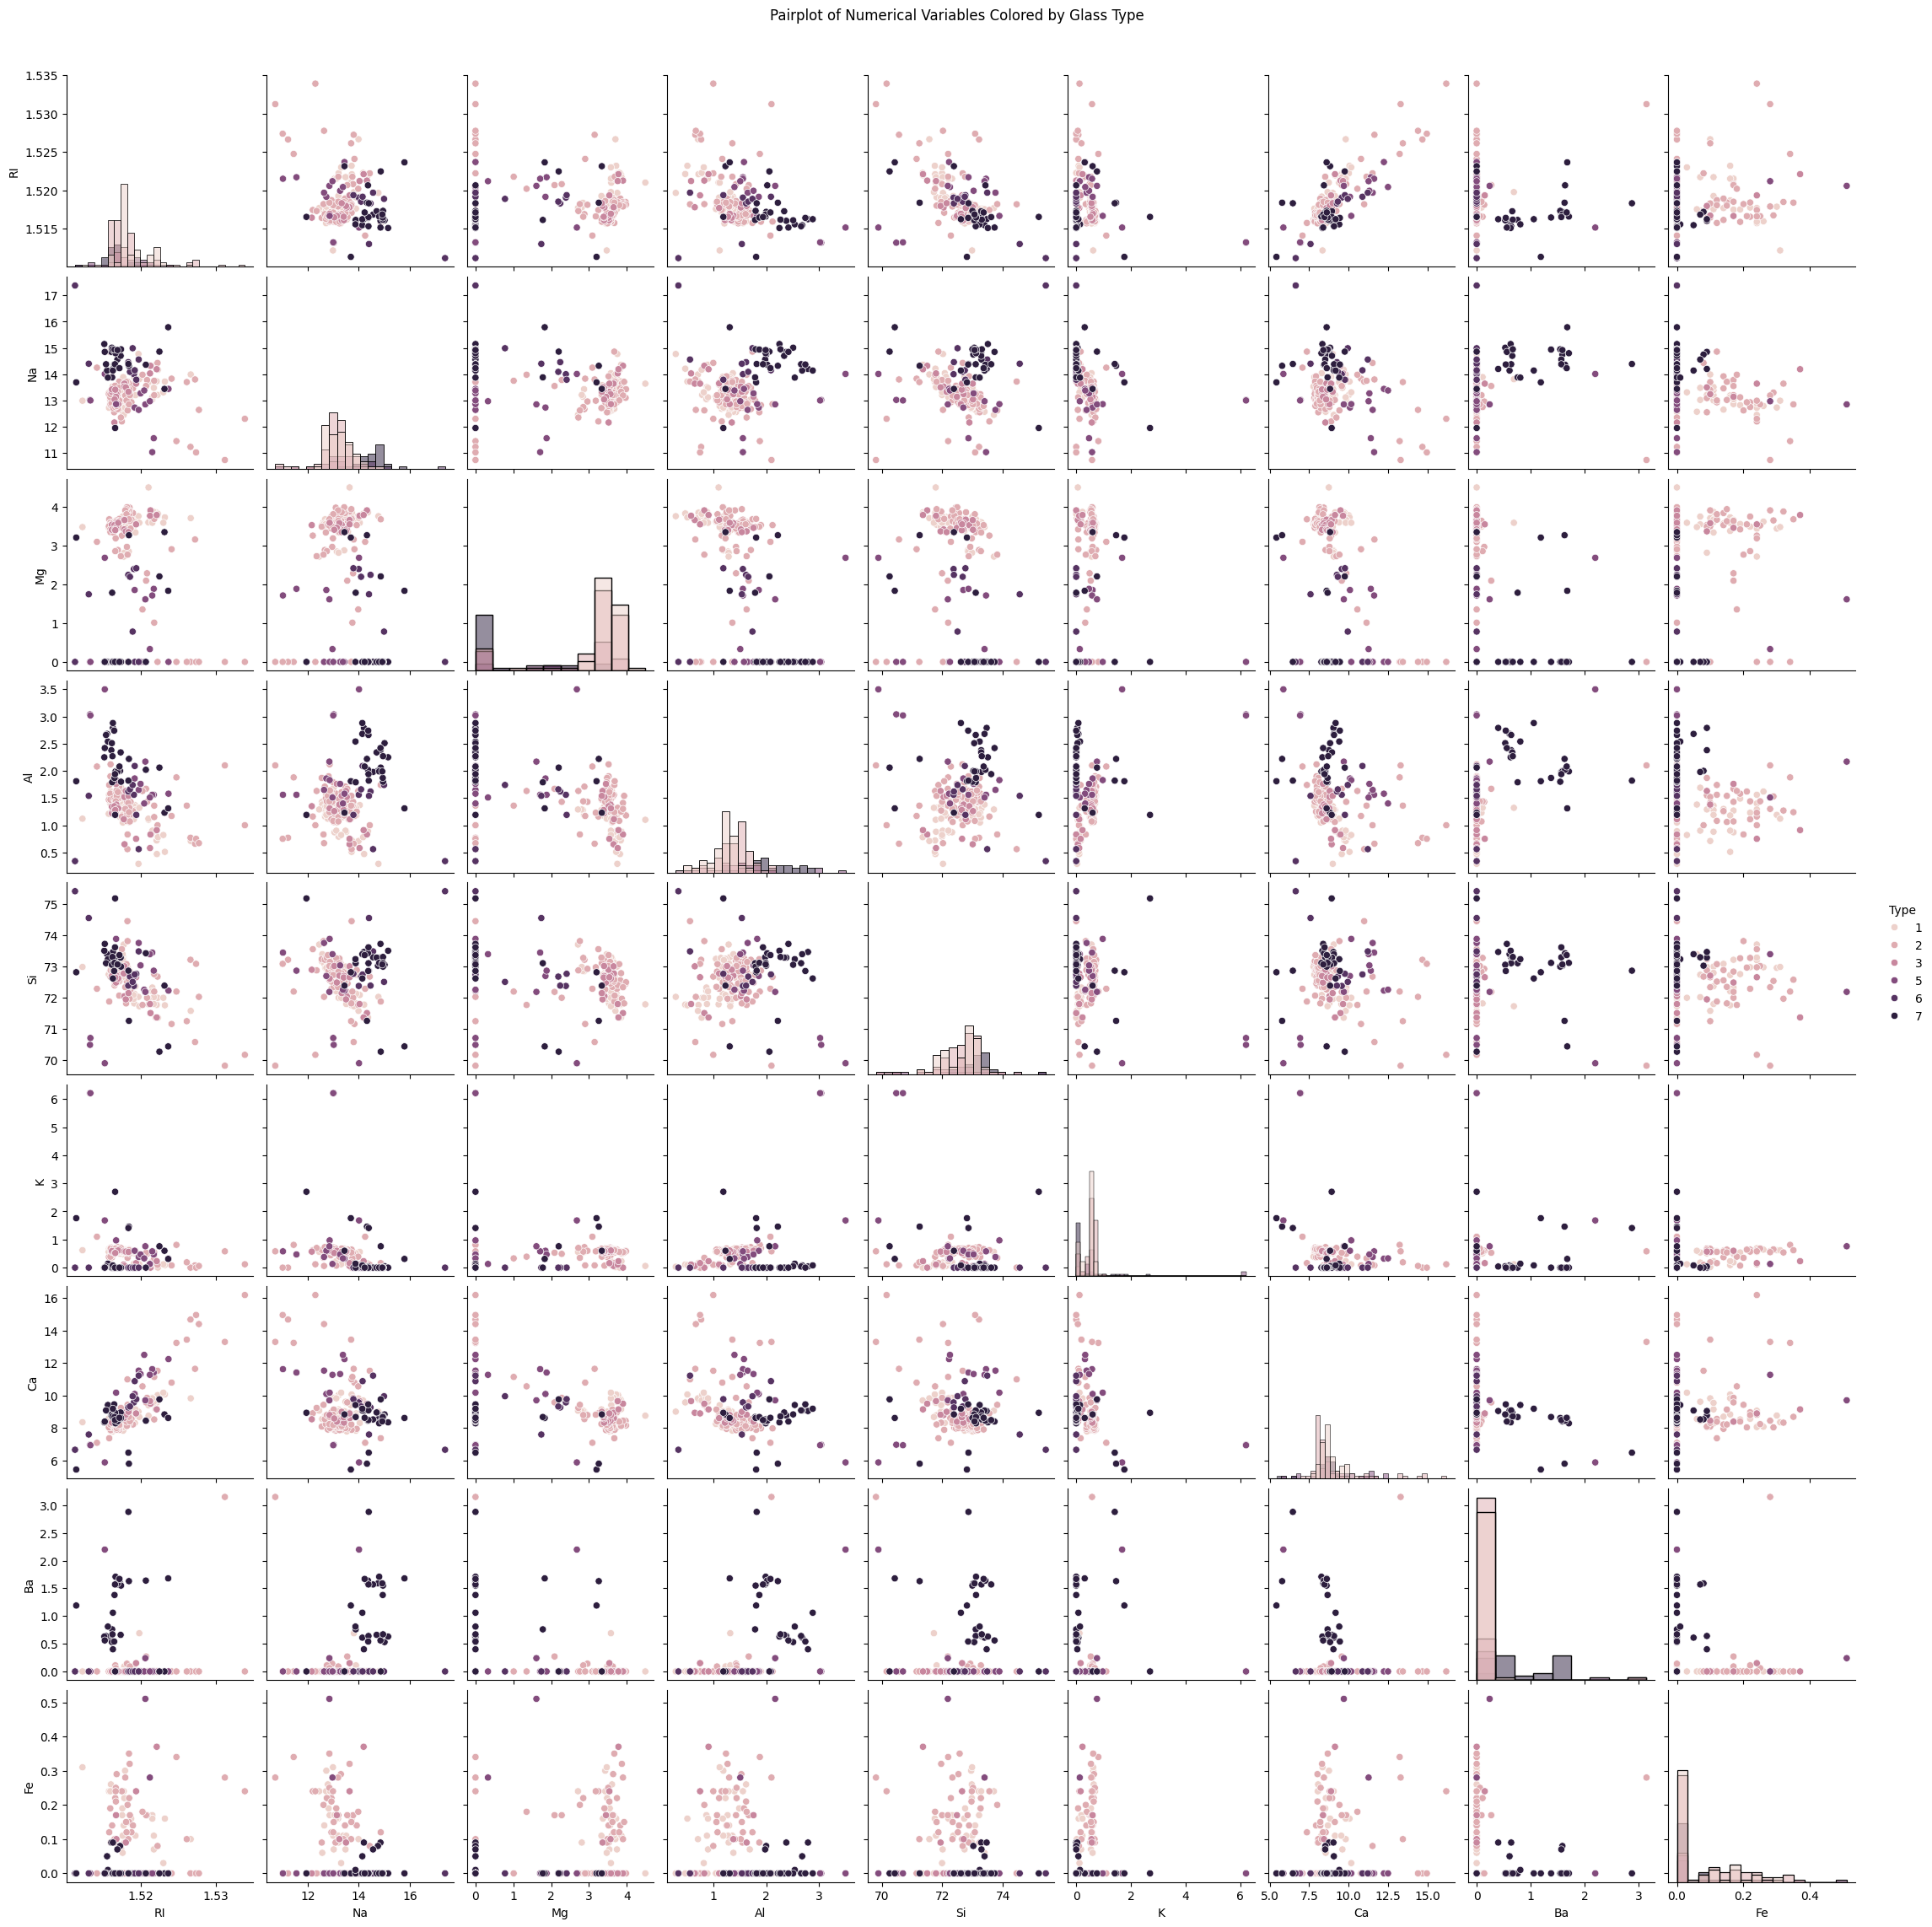

In [16]:
# Pairplot shows scatter plots for each pair of numerical variables and histograms for each variable
sns.pairplot(data, hue='Type', diag_kind='hist')  # 'Type' is used as the hue for different classes
plt.suptitle('Pairplot of Numerical Variables Colored by Glass Type', y=1.02)
plt.show()

### Count Plot for the Target Variable

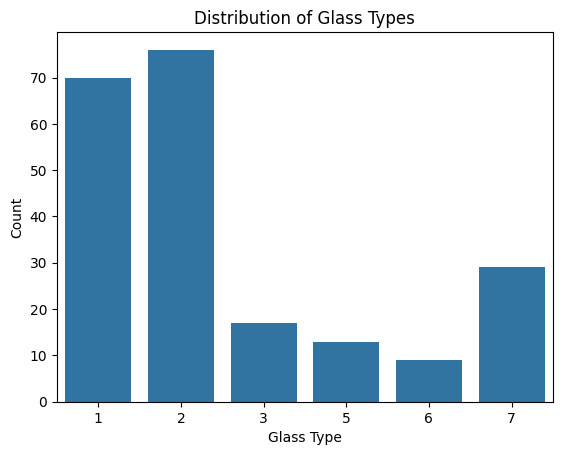

In [17]:
# Visualizing the distribution of different glass types
sns.countplot(x='Type', data=data)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

# **Data Preprocessing**

### Checking for missing values

In [18]:
# Display the count of missing values in each column
# This helps identify columns with missing values, which may require handling before analysis
print("\nChecking for missing values in each column:")
missing_values = data.isnull().sum()
print(missing_values)


Checking for missing values in each column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


### Choosing stategy for handling missing values

In [19]:
# Here, we'll drop rows with missing values, as there may not be many, and imputing might not be feasible without domain knowledge
# However, if missing values are substantial, consider using imputation instead (e.g., filling with mean/median)
if missing_values.sum() > 0:  # Check if there are any missing values
    data = data.dropna()  # Drop rows with missing values
    print("\nRows with missing values have been removed.")
else:
    print("\nNo missing values detected; no removal necessary.")


No missing values detected; no removal necessary.


In [20]:
# Display the shape of the dataset after handling missing values to ensure no data was mistakenly removed
print("Dataset shape after handling missing values:", data.shape)

Dataset shape after handling missing values: (214, 10)


### Encoding Categorical Variables

In [21]:
# Check for categorical columns in the dataset (typically 'object' data types)
# In this dataset, it seems all columns are numeric; however, we double-check to confirm
print("\nChecking for categorical columns:")
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


Checking for categorical columns:
Categorical columns: Index([], dtype='object')


In [22]:
# If there are any categorical columns, apply one-hot encoding
# For instance, if there was a column named 'Type' with text labels, we would apply encoding like this:
# data = pd.get_dummies(data, columns=['Type'], drop_first=True)
if len(categorical_columns) > 0:
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
    print("\nCategorical variables have been one-hot encoded.")
else:
    print("\nNo categorical variables detected; encoding not necessary.")


No categorical variables detected; encoding not necessary.


### Feature Scaling

In [23]:
# Feature scaling is necessary for algorithms sensitive to feature scales (e.g., distance-based algorithms)
# Standardization (mean=0, std=1) or normalization (0 to 1 range) are common approaches
# Here, we'll use StandardScaler to apply standardization
from sklearn.preprocessing import StandardScaler

In [24]:
# Instantiate the StandardScaler
scaler = StandardScaler()

In [25]:
# Apply the scaler to all columns except the target ('Type')
# We use .drop to exclude the target column from scaling
features = data.drop(columns=['Type'])  # Exclude target column
scaled_features = scaler.fit_transform(features)  # Scale features

In [26]:
# Convert the scaled features back into a DataFrame and add the target column back
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)  # Recreate DataFrame with scaled features
scaled_data['Type'] = data['Type'].values  # Add back the target column

In [27]:
# Display the first few rows of the scaled dataset
print("\nPreview of scaled data:")
print(scaled_data.head())


Preview of scaled data:
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  Type  
0 -0.352877 -0.586451     1  
1 -0.352877 -0.586451     1  
2 -0.352877 -0.586451     1  
3 -0.352877 -0.586451     1  
4 -0.352877 -0.586451     1  


### Handling Imbalanced Data

In [28]:
# Check the distribution of the target variable to identify class imbalance
# Class imbalance may affect model performance, so this step is crucial
print("\nDistribution of Glass Types (Target Variable):")
print(scaled_data['Type'].value_counts())


Distribution of Glass Types (Target Variable):
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [29]:
# Apply resampling methods if there is significant class imbalance
# Here, we use SMOTE (Synthetic Minority Over-sampling Technique) for oversampling
# SMOTE generates synthetic samples for minority classes to balance the dataset
from imblearn.over_sampling import SMOTE

In [30]:
# Instantiate SMOTE with a random state for reproducibility
smote = SMOTE(random_state=42)

In [31]:
# Apply SMOTE only to the feature columns (excluding target)
X = scaled_data.drop(columns=['Type'])  # Features only
y = scaled_data['Type']  # Target variable

In [32]:
# Perform SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [33]:
# Convert resampled data back into a DataFrame to maintain structure
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)  # Resampled features
resampled_data['Type'] = y_resampled  # Add back the target variable

In [34]:
# Verify the new distribution of the target variable after resampling
print("\nDistribution of Glass Types after applying SMOTE:")
print(resampled_data['Type'].value_counts())


Distribution of Glass Types after applying SMOTE:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


# **Random Forest Model Implementation**

### Train-Test Split

In [35]:
# Import train_test_split from scikit-learn to divide the data into training and testing sets
from sklearn.model_selection import train_test_split

In [36]:
# Define feature variables (X) and the target variable (y)
X = resampled_data.drop(columns=['Type'])  # All columns except 'Type' are features
y = resampled_data['Type']  # 'Type' is the target variable

In [37]:
# Split the data into 80% training and 20% testing to train and validate the model
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Display the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (364, 9)
Testing features shape: (92, 9)
Training labels shape: (364,)
Testing labels shape: (92,)


### Implementing Random Forest Classifier

In [39]:
# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Instantiate the RandomForestClassifier with a specific number of trees (n_estimators) and random_state for reproducibility
# n_estimators is the number of trees in the forest. Adjust as needed for performance.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [41]:
# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)  # Fit model to training features and labels

RandomForestClassifier(random_state=42)

### Model Evaluation on Test Data

In [42]:
# Import the evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [43]:
# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

In [44]:
# Calculate and display accuracy, precision, recall, and F1-score
# Accuracy measures overall correctness; precision and recall indicate class-specific performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted to handle imbalanced classes
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [45]:
# Display evaluation metrics
print("\nModel Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Model Evaluation Metrics:
Accuracy: 0.9239130434782609
Precision: 0.926268115942029
Recall: 0.9239130434782609
F1-score: 0.9234046297904994


### Displaying Classification Report and Confusion Matrix for Detailed Performance

In [47]:
# Generate and display a detailed classification report for precision, recall, and F1-score per class
# The report provides a breakdown of each metric for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92



In [48]:
# Generate and display a confusion matrix to visualize the performance of the classifier
# The confusion matrix shows the correct and incorrect predictions for each class
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[13  2  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]


# **Bagging and Boosting Methods**

### Bagging with BaggingClassifier

In [55]:
# Import BaggingClassifier from scikit-learn
from sklearn.ensemble import BaggingClassifier

In [56]:
# Instantiate the Bagging Classifier with DecisionTreeClassifier as the base estimator and specify the number of estimators
# The argument is now `estimator` instead of `base_estimator`
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

In [57]:
# Train the Bagging Classifier on the training data
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [58]:
# Predict the test set labels using the trained Bagging Classifier
y_pred_bagging = bagging_clf.predict(X_test)

In [59]:
# Calculate evaluation metrics for Bagging Classifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

In [60]:
# Display Bagging model performance
print("\nBagging Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_bagging)
print("Precision:", precision_bagging)
print("Recall:", recall_bagging)
print("F1-score:", f1_bagging)


Bagging Classifier Evaluation Metrics:
Accuracy: 0.9347826086956522
Precision: 0.9370471014492755
Recall: 0.9347826086956522
F1-score: 0.9347920195746282


# **Boosting with AdaBoostClassifier**

In [63]:
# Import AdaBoostClassifier from scikit-learn
from sklearn.ensemble import AdaBoostClassifier

In [64]:
# Instantiate the AdaBoostClassifier with DecisionTreeClassifier as the estimator
# Update `base_estimator` to `estimator`
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

In [65]:
# Train the AdaBoost Classifier on the training data
ada_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                   n_estimators=100, random_state=42)

In [66]:
# Predict the test set labels using the trained AdaBoost Classifier
y_pred_ada = ada_clf.predict(X_test)

In [67]:
# Calculate evaluation metrics for AdaBoost Classifier
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')

In [68]:
# Display AdaBoost model performance
print("\nAdaBoost Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_ada)
print("Precision:", precision_ada)
print("Recall:", recall_ada)
print("F1-score:", f1_ada)


AdaBoost Classifier Evaluation Metrics:
Accuracy: 0.8586956521739131
Precision: 0.8575767263427111
Recall: 0.8586956521739131
F1-score: 0.8570048309178745


### Boosting with GradientBoostingClassifier

In [69]:
# Import GradientBoostingClassifier from scikit-learn
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
# Instantiate the GradientBoostingClassifier with default parameters
# GradientBoostingClassifier builds trees sequentially, focusing on reducing residual errors
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [71]:
# Train the Gradient Boosting Classifier on the training data
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [72]:
# Predict the test set labels using the trained Gradient Boosting Classifier
y_pred_gb = gb_clf.predict(X_test)

In [73]:
# Calculate evaluation metrics for Gradient Boosting Classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

In [74]:
# Display Gradient Boosting model performance
print("\nGradient Boosting Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)


Gradient Boosting Classifier Evaluation Metrics:
Accuracy: 0.9456521739130435
Precision: 0.9518185618729097
Recall: 0.9456521739130435
F1-score: 0.9463515113326078


## Comparision of Results

In [75]:
# Display a summary of all model performances for easy comparison
print("\n--- Model Comparison ---")
print("Random Forest    - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(accuracy, precision, recall, f1))
print("Bagging          - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(accuracy_bagging, precision_bagging, recall_bagging, f1_bagging))
print("AdaBoost         - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(accuracy_ada, precision_ada, recall_ada, f1_ada))
print("Gradient Boosting- Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(accuracy_gb, precision_gb, recall_gb, f1_gb))


--- Model Comparison ---
Random Forest    - Accuracy: 0.9239, Precision: 0.9263, Recall: 0.9239, F1-score: 0.9234
Bagging          - Accuracy: 0.9348, Precision: 0.9370, Recall: 0.9348, F1-score: 0.9348
AdaBoost         - Accuracy: 0.8587, Precision: 0.8576, Recall: 0.8587, F1-score: 0.8570
Gradient Boosting- Accuracy: 0.9457, Precision: 0.9518, Recall: 0.9457, F1-score: 0.9464


Q1.Explain Bagging and Boosting methods. How is it different from each other.

Bagging (Bootstrap Aggregating) and Boosting are both ensemble learning methods that combine multiple models to improve overall performance, but they work differently. **Bagging** aims to reduce variance by training multiple models independently on different subsets of data created through bootstrapping (random sampling with replacement). Each model votes on the final prediction, making bagging effective for reducing overfitting, especially for high-variance models like decision trees. **Boosting**, on the other hand, focuses on reducing bias by building models sequentially, where each new model tries to correct the errors of the previous one. This iterative approach weights misclassified instances more heavily, resulting in a stronger, often more accurate model. While bagging reduces variance without affecting bias, boosting reduces bias and variance by focusing on improving errors sequentially, often leading to a more powerful but complex model.

Q2. Explain how to handle imbalance in the data.

Handling imbalanced data involves techniques that adjust the distribution of classes to help models learn effectively. Common approaches include **resampling methods** like **oversampling** (increasing instances of the minority class) and undersampling (reducing instances of the majority class). **Synthetic data generation** methods, such as **SMOTE (Synthetic Minority Over-sampling Technique)**, create synthetic samples for the minority class to balance the dataset. **Algorithmic adjustments** can also be made by using model-specific parameters, such as class weights, to penalize misclassifications of minority classes more heavily. Additionally, **ensemble methods** like Balanced Random Forest or using techniques like Boosting can help models focus on minority classes. Choosing the right technique often depends on the dataset and model requirements.